### DS102 | In Class Practice Week 2B - Univariate Analysis II
<hr>
## Learning Objectives
At the end of the lesson, you will be able to:

- use `DataFrame.describe()` to view summary statistics of a dataset

- understand **quartiles** and **percentiles** and use them to identify the **interquartile range (IQR)**

- **identify outliers** using the interquartile range

### Datasets Required for this In Class
1. `seattle-wages-2k.csv`

#### Import the libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read from CSV to `df`

Read the dataset `seattle-wages-2k.csv` into a `df`.

In [3]:
# Exercise: Read seattle-wages-2k.csv to a df.
df = pd.read_csv('seattle-wages-2k.csv')
df.head()

,Department,Job_Title,Hourly_Rate
0,Seattle Public Utilities,"Civil Engrng Spec,Assoc",38.67
1,Seattle Dept of Transportation,Bridge Elecl Maint Supv,46.15
2,City Light,Plng&Dev Spec II,40.93
3,Seattle Center,Stage Tech *,30.42
4,Mayor's Office,Executive2,67.50


### Use `describe()` to find summary statistics of a `DataFrame`

Use `df.describe()` to find out summary statistics of each of the columns in a `df`. You will be able to see the **number of records**, **arithmetic mean / average** of the dataset, the **standard deviation** of the dataset, the **minimum value**, **25th percentile or first quartile**, **50th percentile or median**, **75th percentile or 3rd quartile** and **maximum value** of the numerical dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
Department     2000 non-null object
Job_Title      2000 non-null object
Hourly_Rate    2000 non-null float64
dtypes: float64(1), object(2)
memory usage: 47.0+ KB


In [5]:
# Use df.describe() to find the summary statistics of the df.
df.describe(include = 'all')

,Department,Job_Title,Hourly_Rate
count,2000,2000,2000.000000
unique,34,533,NaN
top,Police Department,Pol Ofcr-Patrl,NaN
freq,296,81,NaN
mean,NaN,NaN,38.930690
std,NaN,NaN,13.925579
min,NaN,NaN,5.530000
25%,NaN,NaN,29.090000
50%,NaN,NaN,38.600000
75%,NaN,NaN,47.977500


### Quartiles and Inter-Quartile Range

`Hourly_Rate` is a numeric dataset. It contains $2000$ records. 

If the values are arranged from the lowest to the highest, 
- the **first quartile** is the value where $25\%$ of values are below the value. It is also called the $25\text{th}$ percentile
- the **second quartile** is the value where $50\%$ of values are below the value. It is also called the $50\text{th}$ percentile or the median
- the **third quartile** is the value where $75\%$ of values are below the value. It is also called the $75\text{th}$ percentile

Besides `describe()` as seen above, you can also use `numpy.percentile(Series, n)` to get the `n`th percentile of the distribution.

In [6]:
# use np.percentile(Series, 25) to get the 25th percentile of the distribution
#
np.percentile(df['Hourly_Rate'], 25)

29.09

In [7]:
# use np.percentile() to get the 50th percentile of the distribution
#
np.percentile(df['Hourly_Rate'], 50)

38.6

In [8]:
# Exercise: Get the 75th percentile of the Hourly_Rate values
np.percentile(df['Hourly_Rate'], 75)

47.9775

Fill in the blanks. 

- The first quartile or 25th percentile is 29.09. 

- The second quartile, 50th percentile or median is 38.6.

- The third quartile or 75th percentile is 47.9775.

The interquartile range, $IQR$ is calculated as:

$$\text{interquartile range, }IQR = \text{third quartile} - \text{first quartile}$$

This value is used to determine outliers. Let $Q1$ be the first quartile and $Q3$ be the third quartile. Also, let $IQR$ be the inter-quartile range. Outliers are values that lie outside the range:

$$
[(Q1-1.5\times IQR), (Q3+1.5\times IQR)]
$$

**Q: ** Determine the $IQR$ of the `Hourly_Rate` of all employees.

In [9]:
# Exercise: assign the 25th percentile and 75th percentile to the 
# variables quartile_1 and quartile_3 respectively
quartile_1 = np.percentile(df['Hourly_Rate'], 25)
quartile_3 = np.percentile(df['Hourly_Rate'], 75)


# Determine the IQR of the dataset and assign it to the variable iqr
iqr = quartile_3 - quartile_1
iqr

18.8875

**Q: ** Using the formula above and the $IQR$, calculate the lower bound and upper bound of the `Hourly_Rate` of all employees.

In [10]:
# Using the formula above and the iqr, calculate the lower bound and upper bound of Hourly_Rate
lower_bound = quartile_1 - (1.5 * iqr)
upper_bound = quartile_3 + (1.5 * iqr)

print("The lower bound is " + str(lower_bound))
print("The upper bound is " + str(upper_bound))

The lower bound is 0.7587500000000027
The upper bound is 76.30875


**Q: ** Finally, find all employees who are outliers, based on their `Hourly_Rate`.

In [11]:
# Find all employees who are outliers, based on Hourly_Rate
lower_bound_cond = df['Hourly_Rate'] < lower_bound
upper_bound_cond = df['Hourly_Rate'] > upper_bound

df[lower_bound_cond | upper_bound_cond]

,Department,Job_Title,Hourly_Rate
5,Office for Civil Rights,Executive2,77.12
25,Fire Department,Executive4,102.08
293,Planning and Community Develop,Executive3,82.01
353,Seattle Dept of Transportation,Executive3,78.54
550,City Budget Office,Executive4,86.83
577,City Light,Electric Util Exec 2,105.00
759,Seattle Dept of Transportation,Executive3,83.83
858,Fire Department,"Fire Chief,Dep-80 Hrs",78.48
922,City Employees Retirement Syst,Executive4 *,107.07
949,City Light,"Electric Util Exec 3,Dir",93.88


Observe how the IQR and outliers determine the whiskers in the box plot.
Validate the value above against the against the aggregation result and histogram plot below.
<div class="alert alert-info">
<b>DS102 Learning Guidelines: </b> Plotting will only be covered in Week 3. You are only expected to <b>interpret</b> the results.
</div>

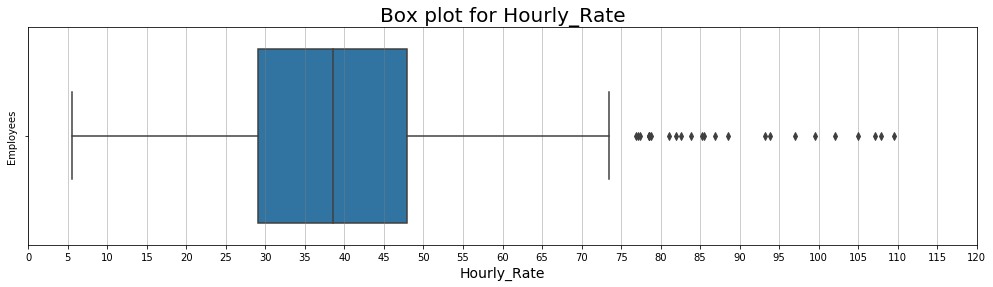

In [34]:
fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(111)

# Plot the boxplot and add the relevant features of the plot
sns.boxplot(df['Hourly_Rate'], ax=ax1)
ax1.set_ylabel('Employees')
ax1.set_title('Box plot for Hourly_Rate', fontsize=20)
ax1.set_xticks(np.arange(0, 121, 5))
ax1.set_xlabel('Hourly_Rate', fontsize=14)
# Use grid to show the gridlines in the plot
ax1.xaxis.grid(True, linestyle='-', color='grey', alpha=0.5)

In [35]:
# Check the boxplot results against the summary statistics
print(df['Hourly_Rate'].describe())

count    2000.000000
mean       38.930690
std        13.925579
min         5.530000
25%        29.090000
50%        38.600000
75%        47.977500
max       109.580000
Name: Hourly_Rate, dtype: float64


Notes on reading the box plot:
- At the lower bound, the whisker is the **higher** of the range and the minimum value.
- At the upper bound, the whisker is the **lower** of the 75th percentile value and the observed value.

**Credits**
- [City of Seattle Wage Data](https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd) for the dataset
<hr>
`HWA-DS102-INCLASS-2B-201903`